In [115]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, HuberRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

## Part I: Preprocessing and EDA

- The data comes from a global e-retailer company, including orders from 2012 to 2015. Import the **Orders** dataset and do some basic EDA. 
- For problem 1 to 3, we mainly focus on data cleaning and data visualizations. You can use all the packages that you are familiar with to conduct some plots and also provide **brief interpretations** about your findings.

In [35]:
orders = pd.read_csv('data/Orders.csv')

In [36]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [41]:
orders.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

In [37]:
orders['Profit'] = orders['Profit'].str.replace('$','')
orders['Profit'] = orders['Profit'].str.replace(',','')
orders['Profit'] = pd.to_numeric(orders['Profit'])
orders['Profit']

<ipython-input-37-5ca1cad7fb6d>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  orders['Profit'] = orders['Profit'].str.replace('$','')


0         62.15
1       -288.77
2        919.97
3        -96.54
4        311.52
          ...  
51285      4.50
51286      3.34
51287      2.48
51288      2.40
51289      1.80
Name: Profit, Length: 51290, dtype: float64

In [40]:
orders['Sales'] = orders['Sales'].str.replace('$','')
orders['Sales'] = orders['Sales'].str.replace(',','')
orders['Sales'] = pd.to_numeric(orders['Sales'])
orders['Sales']

<ipython-input-40-8778ad372ab6>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  orders['Sales'] = orders['Sales'].str.replace('$','')


0         221.98
1        3709.40
2        5175.17
3        2892.51
4        2832.96
          ...   
51285      65.10
51286      16.72
51287       8.56
51288      13.44
51289      61.38
Name: Sales, Length: 51290, dtype: float64

### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.

In [320]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])
orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date'])
orders['Year.Month'] = orders['Order.Date'].dt.strftime('%Y-%m')
yearly_trends = orders.groupby(['Year.Month','Sub.Category']).agg('sum')
yearly_trends = yearly_trends.reset_index()
fig = px.line(yearly_trends, x = 'Year.Month',
              y = 'Quantity',
              color='Sub.Category',
             title = 'Yearly Trends by Category')
fig.show()

In [318]:
orders['Year.Month']

0        2014-11
1        2014-02
2        2014-10
3        2014-01
4        2014-11
          ...   
51285    2015-06
51286    2014-05
51287    2012-08
51288    2013-02
51289    2013-05
Name: Year.Month, Length: 51290, dtype: object

In [156]:
orders['OrderMonth'] = pd.DatetimeIndex(orders['Order.Date']).month
orders['OrderYear'] = pd.DatetimeIndex(orders['Order.Date']).year

In [157]:
orders

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,OrderMonth,OrderYear
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.770,High,11,2014
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.630,Critical,2,2014
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium,10,2014
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.160,Medium,1,2014
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.040,Critical,11,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,6/19/15,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium,6,2015
51286,34337,US-2014-ZD21925140-41765,5/6/14,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High,5,2014
51287,31315,CA-2012-ZD21925140-41147,8/26/12,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,Art,Newell 341,8.56,2,0.0,2.48,1.580,High,8,2012
51288,9596,MX-2013-RB1979518-41322,2/17/13,2/21/13,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,Binders,"Acco Index Tab, Economy",13.44,2,0.0,2.40,1.003,Medium,2,2013


In [56]:
orders_by_month = orders.OrderMonth.value_counts()

In [81]:
X = orders.groupby(['OrderMonth'])['OrderMonth'].agg(['count'])

In [108]:
y = X[['count']].values
y

array([[2611],
       [2209],
       [3007],
       [3032],
       [3787],
       [5302],
       [3195],
       [5065],
       [5958],
       [4556],
       [6311],
       [6257]])

In [111]:
x = range(1,13)
pd.array(x)


<IntegerArray>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Length: 12, dtype: Int64

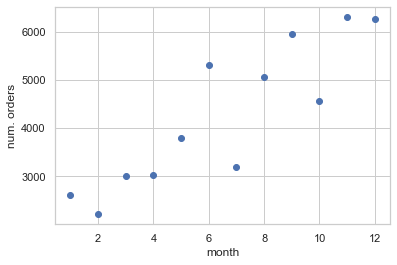

In [114]:
plt.scatter(x, y)
plt.xlabel('month')
plt.ylabel('num. orders')
plt.show()

In [131]:
month_category = orders.groupby(['OrderMonth', 'Category']).agg('count')
month_category = month_category.reset_index()

In [132]:
month_category

,OrderMonth,Category,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,...,Market,Product.ID,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,1,Furniture,491,491,491,491,491,491,491,491,...,491,491,491,491,491,491,491,491,491,491
1,1,Office Supplies,1616,1616,1616,1616,1616,1616,1616,1616,...,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616
2,1,Technology,504,504,504,504,504,504,504,504,...,504,504,504,504,504,504,504,504,504,504
3,2,Furniture,424,424,424,424,424,424,424,424,...,424,424,424,424,424,424,424,424,424,424
4,2,Office Supplies,1319,1319,1319,1319,1319,1319,1319,1319,...,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319
5,2,Technology,466,466,466,466,466,466,466,466,...,466,466,466,466,466,466,466,466,466,466
6,3,Furniture,574,574,574,574,574,574,574,574,...,574,574,574,574,574,574,574,574,574,574
7,3,Office Supplies,1843,1843,1843,1843,1843,1843,1843,1843,...,1843,1843,1843,1843,1843,1843,1843,1843,1843,1843
8,3,Technology,590,590,590,590,590,590,590,590,...,590,590,590,590,590,590,590,590,590,590
9,4,Furniture,569,569,569,569,569,569,569,569,...,569,569,569,569,569,569,569,569,569,569


In [133]:
fig = px.line(month_category, 
             x = "OrderMonth",
             y = "Quantity",
             color = "Category")
fig.show()

### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?
    - 2012:    17477.26
    - 2013:     9269.89
    - 2014:    17510.63
    - 2015:    17112.97

	2. How many customer returned more than once? more than 5 times?
    - More than once: 547
    - More than five times: 46

	3. Which regions are more likely to return orders?
    - Western US, Eastern Asia, Southern Europe

	4. Which categories (sub-categories) of products are more likely to be returned?
    - The top three Categories to be returned, in order are Office Supplies, Technology and Furniture
    - The top three sub-categories are Accessories, Appliances, and Art
    

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

In [206]:
returns = pd.read_csv('data/Returns.csv')
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [158]:
joined = pd.merge(orders, returns, how="left", left_on="Order.ID", right_on="Order ID")

In [159]:
joined['Returned'] = joined['Returned'].fillna('No')

In [160]:
joined['Returned'].value_counts()

No     49070
Yes     2220
Name: Returned, dtype: int64

IndexError: index 0 is out of bounds for axis 0 with size 0

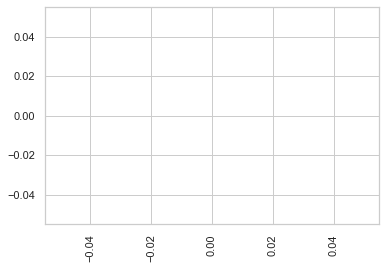

In [323]:
%matplotlib inline
joined[joined['Returned']=='Yes'].groupby(['OrderYear']).agg('sum')['Profit'].plot.bar()

In [165]:
returned = joined[joined['Returned']=='Yes']

In [170]:
returns_per_customer = returned.groupby(['Customer.ID']).agg('count')[['Returned']]

In [177]:
sum(returns_per_customer['Returned'] > 1)

547

In [178]:
sum(returns_per_customer['Returned'] > 5)

46

In [200]:
tot_region_orders = joined.Region_x.value_counts()
ret_region_orders = returned.Region_x.value_counts()
tot_ret_regions = pd.DataFrame({'Total': tot_region_orders, 'Returns': ret_region_orders})
tot_ret_regions['Ratio'] = tot_ret_regions['Returns']/tot_ret_regions['Total']
tot_ret_regions.sort_values(by='Ratio', ascending=False)

,Total,Returns,Ratio
Western US,3203,177,0.055261
Eastern Asia,2374,131,0.055181
Southern Europe,2113,112,0.053005
Southern Africa,478,25,0.052301
Southern US,1620,83,0.051235
Eastern US,2848,134,0.047051
Southeastern Asia,3129,140,0.044743
South America,2988,133,0.044511
Western Asia,2440,108,0.044262
Oceania,3487,154,0.044164


In [204]:
ret_cat_orders = returned.Category.value_counts()
tot_cat_orders = joined.Category.value_counts()
tot_ret_cats = pd.DataFrame({'Total': tot_cat_orders, 'Returns': ret_cat_orders})
tot_ret_cats['Ratio'] = tot_ret_cats['Returns']/tot_ret_cats['Total']
tot_ret_cats.sort_values(by='Ratio', ascending=False)
tot_ret_cats

,Total,Returns,Ratio
Office Supplies,31289,1348,0.043082
Technology,10141,445,0.043881
Furniture,9860,427,0.043306


In [324]:
ret_subcat_orders = returned['Sub.Category'].value_counts()
tot_subcat_orders = joined['Sub.Category'].value_counts()
tot_ret_subcats = pd.DataFrame({'Total': tot_subcat_orders, 'Returns': ret_subcat_orders})
tot_ret_subcats['Ratio'] = tot_ret_subcats['Returns']/tot_ret_subcats['Total']
tot_ret_subcats.sort_values(by='Ratio', ascending=False)

,Total,Returns,Ratio
Labels,2601,137,0.052672
Tables,861,41,0.047619
Accessories,3075,138,0.044878
Art,4864,217,0.044613
Copiers,2223,99,0.044534
Binders,6146,269,0.043768
Phones,3357,145,0.043193
Bookcases,2411,104,0.043136
Paper,3492,150,0.042955
Chairs,3434,147,0.042807


## Part II: Machine Learning and Business Use Case

Now your manager has a basic understanding of why customers returned orders. Next, he wants you to use machine learning to predict which orders are most likely to be returned. In this part, you will generate several features based on our previous findings and your manager's requirements.

### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable
- First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.
- ***Hint:*** the returned orders’ IDs are contained in the dataset “returns”

In [209]:
joined[['Returned']].value_counts()

Returned
No          49070
Yes          2220
dtype: int64

#### Step 2:
- Your manager believes that **how long it took the order to ship** would affect whether the customer would return it or not. 
- He wants you to generate a feature which can measure how long it takes the company to process each order.
- ***Hint:*** Process.Time = Ship.Date - Order.Date

In [223]:
joined['Order.Date'] = pd.DatetimeIndex(joined['Order.Date'])
joined['Ship.Date'] = pd.DatetimeIndex(joined['Ship.Date'])
joined['Process_Time'] = joined['Ship.Date'].sub(joined['Order.Date'])

In [224]:
joined['Process_Time'].value_counts()

4 days    14434
5 days    11221
2 days     7026
6 days     6255
3 days     5035
7 days     3057
0 days     2600
1 days     1662
Name: Process_Time, dtype: int64

#### Step 3:

- If a product has been returned before, it may be returned again. 
- Let us generate a feature indictes how many times the product has been returned before.
- If it never got returned, we just impute using 0.
- ***Hint:*** Group by different Product.ID

In [231]:
joined['Returned'] = joined['Returned'].map({'Yes': True, 'No':False})

In [325]:
#joined.groupby(['Product.ID'])
num_prod_returns = joined.groupby('Product.ID')[['Returned']].agg('sum')
num_prod_returns = num_prod_returns.reset_index()
num_prod_returns

,Product.ID,Returned
0,FUR-BO-3174,0
1,FUR-BO-3175,0
2,FUR-BO-3176,1
3,FUR-BO-3177,0
4,FUR-BO-3409,0
...,...,...
3783,TEC-PH-6365,1
3784,TEC-PH-6413,1
3785,TEC-PH-6425,1
3786,TEC-PH-6427,0


In [245]:
df = pd.merge(joined, num_prod_returns, how="left", on="Product.ID")

In [248]:
df = df.rename(columns={"Returned_y": "Num_Returns"})

In [260]:
df = df.rename(columns={"Returned_x": "Returned"})
df = df.drop('Region_y', axis=1)

In [261]:
joined = df

In [268]:
joined.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_x', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'OrderMonth', 'OrderYear',
       'Returned', 'Order ID', 'Process_Time', 'Num_Returns'],
      dtype='object')

In [265]:
joined.Process_Time = joined.Process_Time.dt.days

In [288]:
joined['Ship.Mode'].value_counts()
#joined

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship.Mode, dtype: int64

In [ ]:
# Ship.Mode, Segment, Region (or Market), Sub.Catergory (or Category), Shipping.Cost, 
# Quantity, Discount, Order.Priority, OrderMonth, Process_time, Num_Returns

### Problem 5: Fitting Models

- You can use any binary classification method you have learned so far.
- Use 80/20 training and test splits to build your model. 
- Double check the column types before you fit the model.
- Only include useful features. i.e all the `ID`s should be excluded from your training set.
- Note that there are only less than 5% of the orders have been returned, so you should consider using the [createDataPartition](https://www.rdocumentation.org/packages/caret/versions/6.0-80/topics/createDataPartition) function from `caret` package and [StratifiedKfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn-model-selection-stratifiedkfold) from sklearn when running cross-validation.
- Do forget to `set.seed()` before the spilt to make your result reproducible.
- **Note:** We are not looking for the best tuned model in the lab so don't spend too much time on grid search. Focus on model evaluation and the business use case of each model.

In [294]:
features = joined[['Ship.Mode', 'Segment', 'Market', 'Category', 'Shipping.Cost', 'Quantity',
                   'Discount', 'Order.Priority', 'OrderMonth', 'Process_Time', 'Num_Returns']]

In [295]:
features = pd.get_dummies(features, columns=['Ship.Mode', 'Segment', 'Market', 'Category', 'Order.Priority'], drop_first=True)
features

,Shipping.Cost,Quantity,Discount,OrderMonth,Process_Time,Num_Returns,Ship.Mode_Same Day,Ship.Mode_Second Class,Ship.Mode_Standard Class,Segment_Corporate,Segment_Home Office,Market_Asia Pacific,Market_Europe,Market_LATAM,Market_USCA,Category_Office Supplies,Category_Technology,Order.Priority_High,Order.Priority_Low,Order.Priority_Medium
0,40.770,2,0.0,11,2,2,0,0,0,0,0,0,0,0,1,0,1,1,0,0
1,923.630,9,0.1,2,2,25,0,1,0,1,0,1,0,0,0,0,0,0,0,0
2,915.490,9,0.1,10,1,24,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,910.160,5,0.1,1,2,23,0,0,0,0,1,0,1,0,0,0,1,0,0,1
4,903.040,8,0.0,11,1,12,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,1.010,5,0.0,6,0,18,1,0,0,1,0,1,0,0,0,1,0,0,0,1
51286,1.930,5,0.2,5,4,8,0,0,1,0,0,0,0,0,1,0,0,1,0,0
51287,1.580,2,0.0,8,5,7,0,1,0,0,0,0,0,0,1,1,0,1,0,0
51288,1.003,2,0.0,2,4,36,0,0,1,0,1,0,0,1,0,1,0,0,0,1


In [302]:
Y = joined['Returned'].map({False:0, True:1})
Y.value_counts()
type(Y)

pandas.core.series.Series

In [328]:
from sklearn.linear_model import LogisticRegression
# Use class_weight to balance the dataset
#logistic = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic = LogisticRegression(max_iter=100000, class_weight='balanced')
logistic.fit(features,Y)
logistic.score(features,Y)

0.5130824722168064

In [332]:
Y.value_counts()

0    49070
1     2220
Name: Returned, dtype: int64

In [307]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y,logistic.predict(features))

array([[49070,     0],
       [ 2220,     0]])

In [ ]:
#cat quant month num_returns, process_time

In [336]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features,Y, random_state=42, stratify=Y)

In [337]:
logistic.fit(X_train,Y_train)
print(logistic.score(X_train,Y_train))
print(logistic.score(X_test,Y_test))

0.512881170873736
0.5115027684629182


In [313]:
confusion_matrix(Y_test,logistic.predict(X_test))

array([[9840,    0],
       [ 418,    0]])

In [314]:
from sklearn.model_selection import StratifiedKFold

In [316]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(features, Y)

5

### Problem 6: Evaluating Models
- What is the best metric to evaluate your model. Is accuracy good for this case?
- Now you have multiple models, which one would you pick? 
- Can you get any clue from the confusion matrix? What is the meaning of precision and recall in this case? Which one do you care the most? How will your model help the manager make decisions?
- **Note:** The last question is open-ended. Your answer could be completely different depending on your understanding of this business problem.

### Problem 5: Fitting Models

- You can use any binary classification method you have learned so far.
- Use 80/20 training and test splits to build your model. 
- Double check the column types before you fit the model.
- Only include useful features. i.e all the `ID`s should be excluded from your training set.
- Note that there are only less than 5% of the orders have been returned, so you should consider using the [createDataPartition](https://www.rdocumentation.org/packages/caret/versions/6.0-80/topics/createDataPartition) function from `caret` package and [StratifiedKfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn-model-selection-stratifiedkfold) from sklearn when running cross-validation.
- Do forget to `set.seed()` before the spilt to make your result reproducible.
- **Note:** We are not looking for the best tuned model in the lab so don't spend too much time on grid search. Focus on model evaluation and the business use case of each model.

### Problem 6: Evaluating Models
- What is the best metric to evaluate your model. Is accuracy good for this case?
- Now you have multiple models, which one would you pick? 
- Can you get any clue from the confusion matrix? What is the meaning of precision and recall in this case? Which one do you care the most? How will your model help the manager make decisions?
- **Note:** The last question is open-ended. Your answer could be completely different depending on your understanding of this business problem.

### Problem 7: Feature Engineering Revisit
- Is there anything wrong with the new feature we generated? How should we fix it?
- ***Hint***: For the real test set, we do not know it will get returned or not.